In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
!pip install prettytable
from prettytable import PrettyTable
tableData = PrettyTable()

tableData.field_names = ["Layers", "Con2d", "Accuracy"]
print(tableData)

+--------+-------+----------+
| Layers | Con2d | Accuracy |
+--------+-------+----------+
+--------+-------+----------+


In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


# 3 layer with 3, 3 con2d

In [0]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)              0         
__________

In [0]:

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 160us/step - loss: 0.2757 - acc: 0.9125 - val_loss: 0.0505 - val_acc: 0.9840
Epoch 2/12
60000/60000 [==============================] - 9s 150us/step - loss: 0.0833 - acc: 0.9744 - val_loss: 0.0321 - val_acc: 0.9888
Epoch 3/12
60000/60000 [==============================] - 9s 151us/step - loss: 0.0663 - acc: 0.9802 - val_loss: 0.0311 - val_acc: 0.9897
Epoch 4/12
60000/60000 [==============================] - 9s 151us/step - loss: 0.0533 - acc: 0.9843 - val_loss: 0.0315 - val_acc: 0.9884
Epoch 5/12
60000/60000 [==============================] - 9s 149us/step - loss: 0.0452 - acc: 0.9867 - val_loss: 0.0224 - val_acc: 0.9923
Epoch 6/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0416 - acc: 0.9874 - val_loss: 0.0246 - val_acc: 0.9917
Epoch 7/12
60000/60000 [==============================] - 9s 148us/step - loss: 0.0395 - acc: 0.9885 - val_loss: 0.0237 -

Test loss: 0.017361374408018673
Test accuracy: 0.9952


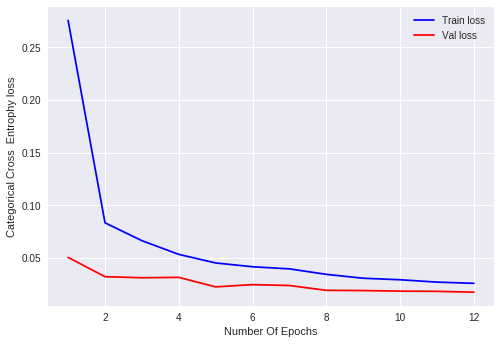

In [0]:
import matplotlib.pyplot as plt

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']

plt.plot(x, ty, 'b', label= 'Train loss')
plt.plot(x, vy, 'r', label= 'Val loss')
plt.legend()
plt.xlabel("Number Of Epochs")
plt.ylabel("Categorical Cross  Entrophy loss")
plt.show()


In [0]:
tableData.add_row(["3", "(3,3)", score[1]])

# 5 layer with 5,5 con2d

In [0]:

model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape, border_mode = "same"))

model1.add(Conv2D(64, (5, 5), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))


model1.add(Conv2D(64, (5, 5), activation='relu', border_mode = "same"))
model1.add(Dropout(0.25))


model1.add(Conv2D(128, (5, 5), activation='relu', border_mode = "same"))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(64, (5, 5), activation='relu', border_mode = "same"))


model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_63 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 24, 24, 64)        51264     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 12, 12, 64)        102464    
_________________________________________________________________
dropout_21 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 12, 12, 128)       204928    
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 6, 6, 128)         0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, kernel_size=(5, 5), activation="relu", input_shape=(28, 28, 1..., padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="relu", padding="same")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (5, 5), activation="relu", padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="relu", padding="same")`


In [0]:

model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 17s 281us/step - loss: 0.2732 - acc: 0.9146 - val_loss: 0.0417 - val_acc: 0.9869
Epoch 2/12
60000/60000 [==============================] - 15s 252us/step - loss: 0.0581 - acc: 0.9838 - val_loss: 0.0316 - val_acc: 0.9896
Epoch 3/12
60000/60000 [==============================] - 15s 253us/step - loss: 0.0367 - acc: 0.9896 - val_loss: 0.0219 - val_acc: 0.9933
Epoch 4/12
60000/60000 [==============================] - 15s 256us/step - loss: 0.0286 - acc: 0.9922 - val_loss: 0.0220 - val_acc: 0.9928
Epoch 5/12
60000/60000 [==============================] - 15s 257us/step - loss: 0.0211 - acc: 0.9940 - val_loss: 0.0263 - val_acc: 0.9921
Epoch 6/12
60000/60000 [==============================] - 15s 255us/step - loss: 0.0174 - acc: 0.9952 - val_loss: 0.0203 - val_acc: 0.9944
Epoch 7/12
60000/60000 [==============================] - 15s 255us/step - loss: 0.0144 - acc: 0.9958 - val_loss: 0.

Test loss: 0.022608617243843446
Test accuracy: 0.9953


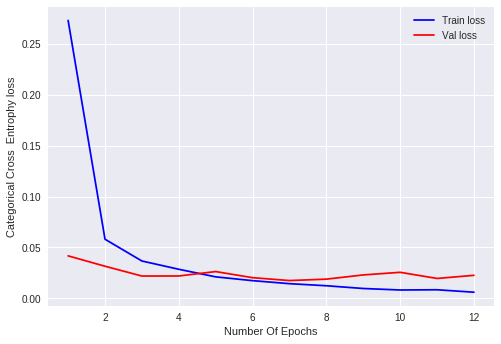

In [0]:

score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']

plt.plot(x, ty, 'b', label= 'Train loss')
plt.plot(x, vy, 'r', label= 'Val loss')
plt.legend()
plt.xlabel("Number Of Epochs")
plt.ylabel("Categorical Cross  Entrophy loss")
plt.show()


In [0]:
tableData.add_row(["5", "(5,5)", score[1]])

# 7 layer with 7,7 conv2d

In [0]:

model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape, border_mode = "same"))

model2.add(Conv2D(64, (7, 7), activation='relu', border_mode = "same"))


model2.add(Conv2D(64, (7, 7), activation='relu', border_mode = "same"))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Dropout(0.25))


model2.add(Conv2D(256, (7, 7), activation='relu', border_mode = "same"))

model2.add(Conv2D(128, (7, 7), activation='relu', border_mode = "same"))

model2.add(Conv2D(128, (7, 7), activation='relu'))

model2.add(MaxPooling2D(pool_size=(2, 2)))


model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_102 (Conv2D)          (None, 28, 28, 32)        1600      
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 28, 28, 64)        100416    
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 28, 28, 64)        200768    
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_36 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_105 (Conv2D)          (None, 14, 14, 256)       803072    
_________________________________________________________________
conv2d_106 (Conv2D)          (None, 14, 14, 128)       1605760   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, kernel_size=(7, 7), activation="relu", input_shape=(28, 28, 1..., padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (7, 7), activation="relu", padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (7, 7), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (7, 7), activation="relu", padding="same")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (7, 

In [0]:

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 16s 268us/step - loss: 0.0048 - acc: 0.9987 - val_loss: 0.0220 - val_acc: 0.9947
Epoch 2/12
60000/60000 [==============================] - 15s 253us/step - loss: 0.0054 - acc: 0.9985 - val_loss: 0.0288 - val_acc: 0.9950
Epoch 3/12
60000/60000 [==============================] - 15s 253us/step - loss: 0.0041 - acc: 0.9986 - val_loss: 0.0260 - val_acc: 0.9943
Epoch 4/12
60000/60000 [==============================] - 15s 252us/step - loss: 0.0046 - acc: 0.9988 - val_loss: 0.0255 - val_acc: 0.9950
Epoch 5/12
60000/60000 [==============================] - 15s 256us/step - loss: 0.0039 - acc: 0.9988 - val_loss: 0.0282 - val_acc: 0.9942
Epoch 6/12
60000/60000 [==============================] - 15s 258us/step - loss: 0.0032 - acc: 0.9992 - val_loss: 0.0282 - val_acc: 0.9951
Epoch 7/12
60000/60000 [==============================] - 15s 255us/step - loss: 0.0030 - acc: 0.9991 - val_loss: 0.

Test loss: 2.304127992248535
Test accuracy: 0.0906


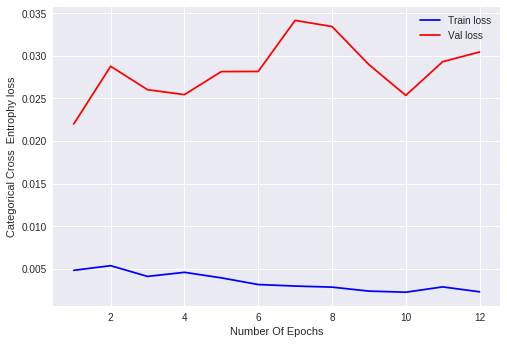

In [0]:

score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']

plt.plot(x, ty, 'b', label= 'Train loss')
plt.plot(x, vy, 'r', label= 'Val loss')
plt.legend()
plt.xlabel("Number Of Epochs")
plt.ylabel("Categorical Cross  Entrophy loss")
plt.show()


In [0]:
tableData.add_row(["7", "(7,7)", score[1]])

# Obsevation

In [0]:
print(tableData)

+--------+-------+----------+
| Layers | Con2d | Accuracy |
+--------+-------+----------+
|   3    | (3,3) |  0.9952  |
|   5    | (5,5) |  0.9953  |
|   7    | (7,7) |  0.0906  |
+--------+-------+----------+


# Conclusion
1. convolution layer with 3 layers and convolution of (3,3) and convolution layer with 5 layers and convolution of (5,5)
have performed very well with an accuracy close to 1

2. convolution layer with  7 layers and convolution of (7,7) performed very worst 